In [154]:
using Lux, ADTypes, LuxCUDA, Optimisers, Printf, Random, Statistics, Zygote, LaTeXStrings, Plots

In [155]:
x = reshape(Float32.(collect(range(0, 2π, length=50))), 1,50) 
y = reshape(Float32.(sin.(x)), 1, 50)

plot(x[1, :], y[1, :], legend=false, xlabel=L"x", ylabel=L"y", tick_direction=:out)
scatter!(x[1, :], y[1, :], markersize=3)

model = Chain(Dense(1 => 16, atan), Dense(16 => 1))
const loss_function = MSELoss()
const dev_cpu = cpu_device()
const dev_gpu = gpu_device()
rng = MersenneTwister()
Random.seed!(rng, 1)
ps, st = Lux.setup(rng, model) |> dev_gpu
opt = Adam(0.03f0)

Adam(0.03, (0.9, 0.999), 1.0e-8)

In [156]:
function main(tstate::Training.TrainState, vjp, data, epochs)
    data = data .|> gpu_device()
    for epoch in 1:epochs
        _, loss, _, tstate = Training.single_train_step!(vjp, loss_function, data, tstate)
        if epoch % 50 == 1 || epoch == epochs
            @printf "Epoch: %3d \t Loss: %.5g\n" epoch loss
        end
    end
    return tstate
end
tstate = main(tstate, vjp_rule, (x, y), 1000)

Epoch:   1 	 Loss: 2.171e-05
Epoch:  51 	 Loss: 7.425e-06
Epoch: 101 	 Loss: 5.8999e-06
Epoch: 151 	 Loss: 5.2143e-06
Epoch: 201 	 Loss: 4.7936e-06
Epoch: 251 	 Loss: 0.0009887
Epoch: 301 	 Loss: 2.7672e-05
Epoch: 351 	 Loss: 6.573e-06
Epoch: 401 	 Loss: 5.2227e-06
Epoch: 451 	 Loss: 4.6649e-06
Epoch: 501 	 Loss: 4.3212e-06
Epoch: 551 	 Loss: 0.00049272
Epoch: 601 	 Loss: 0.00024514
Epoch: 651 	 Loss: 1.0008e-05
Epoch: 701 	 Loss: 6.1087e-06
Epoch: 751 	 Loss: 5.0748e-06
Epoch: 801 	 Loss: 4.5688e-06
Epoch: 851 	 Loss: 4.2461e-06
Epoch: 901 	 Loss: 4.006e-06
Epoch: 951 	 Loss: 0.0063404
Epoch: 1000 	 Loss: 2.3858e-05


TrainState
    model: Chain{@NamedTuple{layer_1::Dense{typeof(atan), Int64, Int64, Nothing, Nothing, Static.True}, layer_2::Dense{typeof(identity), Int64, Int64, Nothing, Nothing, Static.True}}, Nothing}((layer_1 = Dense(1 => 16, atan), layer_2 = Dense(16 => 1)), nothing)
    # of parameters: 49
    # of states: 0
    optimizer: Adam(0.03, (0.9, 0.999), 1.0e-8)
    step: 3250

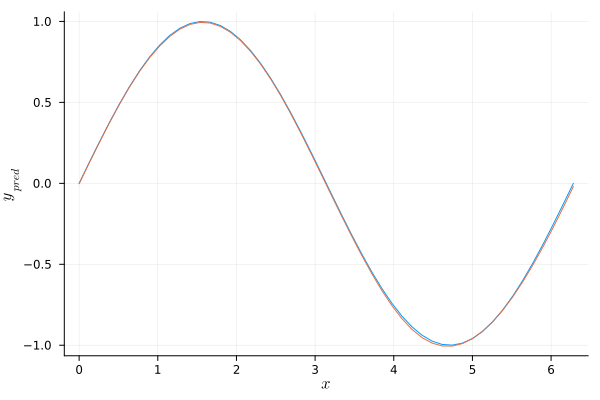

In [157]:
y_pred = dev_cpu(Lux.apply(tstate.model, dev_gpu(x), tstate.parameters, tstate.states)[1])
plot(x[1, :], y[1, :], legend=false, xlabel=L"x", ylabel=L"y", tick_direction=:out)
plot!(x[1, :], y_pred[1, :], legend=false, xlabel=L"x", ylabel=L"y_{pred}", tick_direction=:out)
 